Presentation Video: https://njit.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=201d75d2-dc73-460a-a5e1-b21e00152707

In [6]:
# Import Packages
#Task 1
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#Task 2
import matplotlib.pyplot as plt
import seaborn as sns

# Task 3
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

[2018-Squirrel_Data.csv] (https://drive.google.com/file/d/1xieqBLFzd9MqjfaHn911vmz9uuDwvKA4/view?usp=sharing)
(https://data.cityofnewyork.us/Environment/2018-Central-Park-Squirrel-Census-Squirrel-Data/vfnx-vebw/about_data)

Task 1: Data Collection and Preprocessing

1. Initial Inspection of Data Set

In [7]:
sData = pd.read_csv('2018-Squirrel_Data.csv')

# Check first few lines of Data
sData.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,NaN,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)


In [8]:
#Check for missing values
sData.isnull().sum()

X                                                0
Y                                                0
Unique Squirrel ID                               0
Hectare                                          0
Shift                                            0
Date                                             0
Hectare Squirrel Number                          0
Age                                            121
Primary Fur Color                               55
Highlight Fur Color                           1086
Combination of Primary and Highlight Color       0
Color notes                                   2841
Location                                        64
Above Ground Sighter Measurement               114
Specific Location                             2547
Running                                          0
Chasing                                          0
Climbing                                         0
Eating                                           0
Foraging                       

In [9]:
# Inspect Data Types and Columns
sData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   X                                           3023 non-null   float64
 1   Y                                           3023 non-null   float64
 2   Unique Squirrel ID                          3023 non-null   object 
 3   Hectare                                     3023 non-null   object 
 4   Shift                                       3023 non-null   object 
 5   Date                                        3023 non-null   int64  
 6   Hectare Squirrel Number                     3023 non-null   int64  
 7   Age                                         2902 non-null   object 
 8   Primary Fur Color                           2968 non-null   object 
 9   Highlight Fur Color                         1937 non-null   object 
 10  Combination 

2. Removing Duplicate Entries in Data Set

In [10]:
# check and clean any duplicate rows that are in the data set
duplicate_rows = sData[sData.duplicated(subset=['Unique Squirrel ID'])]
print("Number of Duplicate rows / Total number of Rows:")
print(len(duplicate_rows), "/", len(sData))

print()

sData_clean = sData.drop_duplicates(subset = ['Unique Squirrel ID'])
print("Number of Rows after Removing Duplicates")
print(len(sData_clean))

Number of Duplicate rows / Total number of Rows:
5 / 3023

Number of Rows after Removing Duplicates
3018


3. Handeling Missing Values in the Data Set

In [11]:
missing_values = sData.isnull().sum()
missing_values

X                                                0
Y                                                0
Unique Squirrel ID                               0
Hectare                                          0
Shift                                            0
Date                                             0
Hectare Squirrel Number                          0
Age                                            121
Primary Fur Color                               55
Highlight Fur Color                           1086
Combination of Primary and Highlight Color       0
Color notes                                   2841
Location                                        64
Above Ground Sighter Measurement               114
Specific Location                             2547
Running                                          0
Chasing                                          0
Climbing                                         0
Eating                                           0
Foraging                       

In [12]:
# Handling missing values in 'Primary Fur Color' column
sData['Primary Fur Color'].fillna('Unknown')

# Handling missing values in 'Age' column
age_mode = sData['Age'].mode()[0]
sData['Age'].fillna(age_mode)

# Handing missing values of Latitude and Longitude
sData.dropna(subset = ['X', 'Y'], inplace = True)

# Verifyng that the missing values are handled 
sData.isnull().sum()

X                                                0
Y                                                0
Unique Squirrel ID                               0
Hectare                                          0
Shift                                            0
Date                                             0
Hectare Squirrel Number                          0
Age                                            121
Primary Fur Color                               55
Highlight Fur Color                           1086
Combination of Primary and Highlight Color       0
Color notes                                   2841
Location                                        64
Above Ground Sighter Measurement               114
Specific Location                             2547
Running                                          0
Chasing                                          0
Climbing                                         0
Eating                                           0
Foraging                       

4. Standardizing Categorical Values

In [13]:
# Convert categorical columns to lowercase and strip any extra whitespace
sData['Primary Fur Color'] = sData['Primary Fur Color'].str.lower().str.strip()
sData['Age'] = sData['Age'].str.lower().str.strip()

# Mapping consistent values in 'Primary Fur Color' and 'Age'
# Standardizing fur color values
fur_color_mapping = {
    'gray': 'gray',
    'grey': 'gray',
    'cinnamon': 'cinnamon',
    'black': 'black',
}
sData['Primary Fur Color'] = sData['Primary Fur Color'].map(fur_color_mapping)

# Standardizing age values
age_mapping = {
    'adult': 'adult',
    'juvenile': 'juvenile',
}
sData['Age'] = sData['Age'].map(age_mapping)

# Display unique values to confirm standardization
print(sData['Primary Fur Color'].unique())
print(sData['Age'].unique())


[nan 'gray' 'cinnamon' 'black']
[nan 'adult' 'juvenile']


5. Outlier Detection and Removal

In [14]:
# Define Central Park's Longitude and Latitude
min_latitude, max_latitude = 40.764, 40.800
min_longitude, max_longitude = -73.981, -73.949

# filter Rows to include only those with in central park's boundries
sData_cleaned = sData[
    (sData['Y'] >= min_latitude) & (sData['Y'] <= max_latitude) &
    (sData['X'] >= min_longitude) & (sData['X'] <= max_longitude)
]

print("Original number of rows:", len(sData))
print("Number of rows after removing outliers:", len(sData_cleaned))

Original number of rows: 3023
Number of rows after removing outliers: 3015


6. Standardardizing and Normalizing Numerical Data

In [15]:
# Normalization code
nScaler = MinMaxScaler()

# Apply Normalization on 'X' and 'Y' columns
sData[['X_normalized', 'Y_normalized']] = nScaler.fit_transform(sData[['X', 'Y']])

# Display the first few rows to varify normalization
print(sData[['X', 'Y', 'X_normalized', 'Y_normalized']].head())

           X          Y  X_normalized  Y_normalized
0 -73.956134  40.794082      0.796012      0.828557
1 -73.968857  40.783783      0.391296      0.536013
2 -73.974281  40.775534      0.218770      0.301721
3 -73.959641  40.790313      0.684458      0.721493
4 -73.970268  40.776213      0.346439      0.321008


In [16]:
# Standardization
sScaler = StandardScaler()

sData[['X_standardized', 'Y_standardized']] = sScaler.fit_transform(sData[['X','Y']])

print(sData[['X', 'Y', 'X_standardized', 'Y_standardized']].head())

           X          Y  X_standardized  Y_standardized
0 -73.956134  40.794082        1.430332        1.286461
1 -73.968857  40.783783       -0.216649        0.284874
2 -73.974281  40.775534       -0.918741       -0.517271
3 -73.959641  40.790313        0.976366        0.919904
4 -73.970268  40.776213       -0.399196       -0.451237


Task 2: Data Visualization

1. Bar Plot for Fur Color Distribution

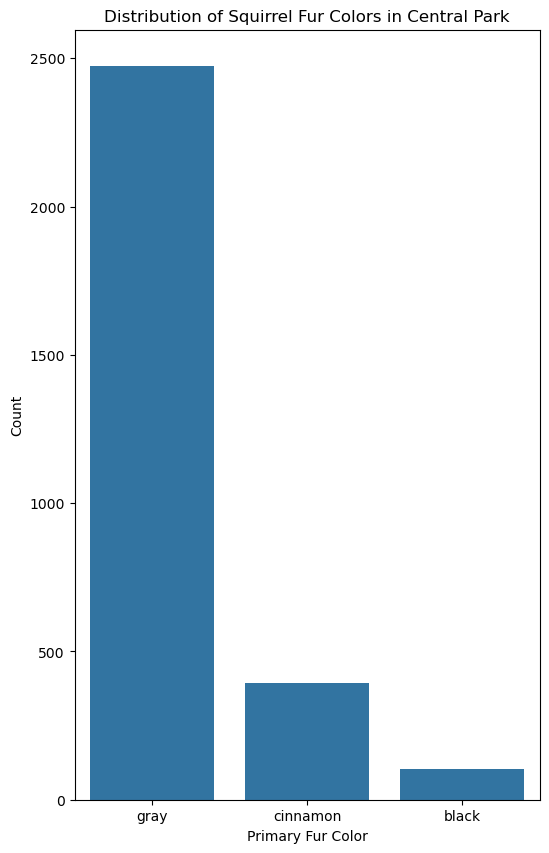

In [17]:
plt.figure(figsize = (6, 10))
sns.countplot(data = sData, x = 'Primary Fur Color', order = sData['Primary Fur Color'].value_counts().index)
plt.title('Distribution of Squirrel Fur Colors in Central Park')
plt.xlabel('Primary Fur Color')
plt.ylabel('Count')
plt.show()

2. Pie Chart for Age Distribution

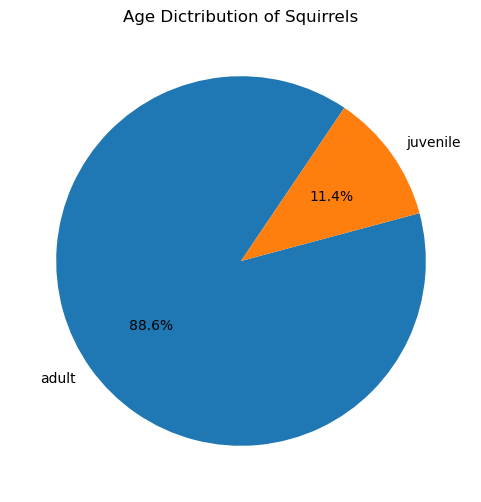

In [18]:
age_count = sData['Age'].value_counts()
plt.figure(figsize = (6,6))
plt.pie(age_count, labels = age_count.index, autopct = '%1.1f%%', startangle = 56)
plt.title('Age Dictribution of Squirrels')
plt.show()

3. Heatmap for Sightings by Region and Fur Color

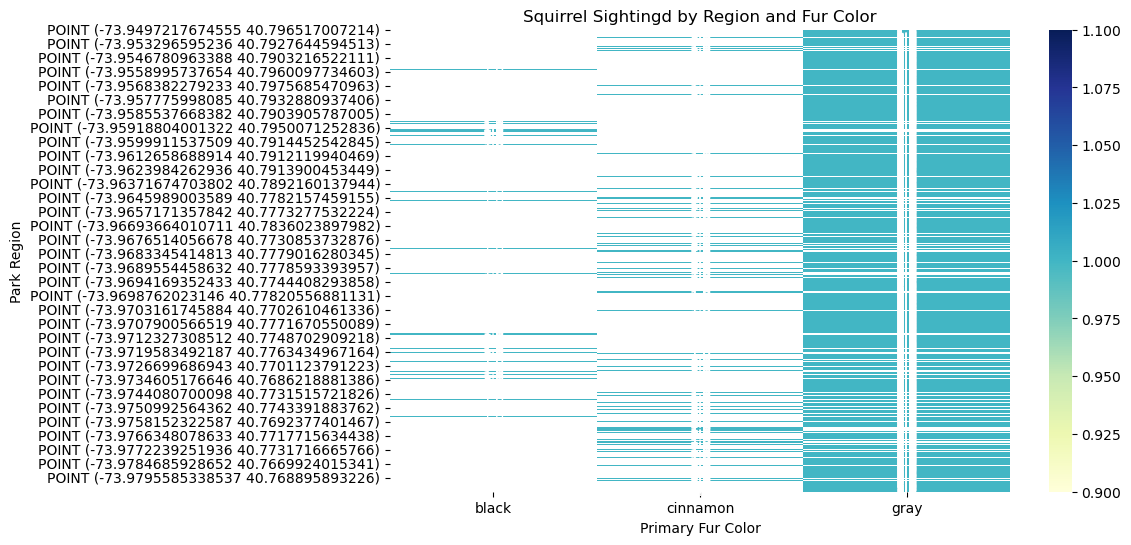

In [19]:
region_color = sData.pivot_table(index = 'Lat/Long', columns = 'Primary Fur Color', values = 'Unique Squirrel ID', aggfunc = 'count')
plt.figure(figsize = (10, 6))
sns.heatmap(region_color, annot = True, fmt = '1', cmap = "YlGnBu")
plt.title('Squirrel Sightingd by Region and Fur Color')
plt.xlabel('Primary Fur Color')
plt.ylabel('Park Region')
plt.show()

4. Scatter Plot for Latitude and Longitude for Sighting Distribution

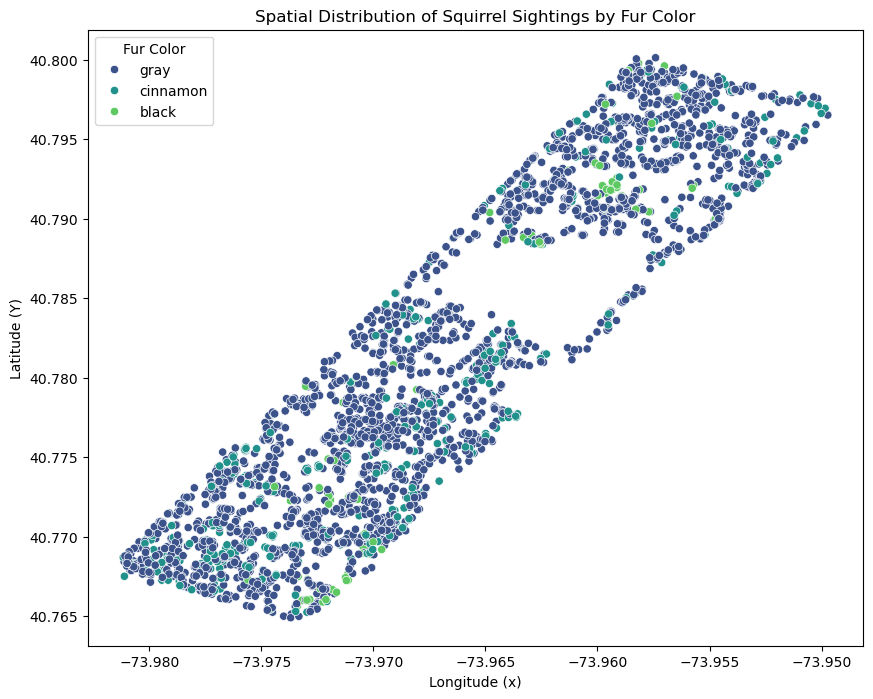

In [20]:
plt.figure(figsize = (10, 8))
sns.scatterplot(data = sData, x = 'X', y = 'Y', hue = 'Primary Fur Color', palette = 'viridis')
plt.title('Spatial Distribution of Squirrel Sightings by Fur Color')
plt.xlabel('Longitude (x)')
plt.ylabel('Latitude (Y)')
plt.legend(title = 'Fur Color')
plt.show()

Task 3: regression Analysis

step 1: define a Target Variable
Assuming the data set includes a hypothetical, then "Squirrel Activity Score", basically a continuous variable representing activity level, will be the target variable

step 2: Feature Selection
Categorical Feature: Primary Fur Color
Numerical Feature: Latitude (Y) or Longitude (X). Will reprrsent location

Step 3: Apply Multiple Regression

In [21]:
# Step 1: apply one hot encoding to the categorical feature
sData_encoded = pd.get_dummies(sData, columns = ['Primary Fur Color'], drop_first = True)

# step 2: Define Activites columns
activity_colomns = ['Running', 'Chasing', 'Climbing', 'Eating', 'Foraging']
sData_encoded['Activity Score'] = sData_encoded[activity_colomns].sum(axis = 1)

# step 3: define features (X) and target(y)
X = sData_encoded[['Y', 'Primary Fur Color_cinnamon', 'Primary Fur Color_gray']]
y = sData_encoded['Activity Score']

# step 4: convert all columns to numeric and handle any non numeric issues
X = X.apply(pd.to_numeric, errors = 'coerce')
y = pd.to_numeric(y, errors = 'coerce')

# step 5: Drop missing values
X, y = X.align(y, join = 'inner', axis = 0)
X = X.dropna()
y = y.dropna()

# step 6: Split into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# step 7: Fit Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# step 9: Make Predictionf on the test set
y_pred = model.predict(X_test)

# step 9: evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)


In [22]:
print(f"Mean Absolute Error: {mae}")
print(f"R-Squared: {r_squared}")

# step 10: display learned coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Mean Absolute Error: 0.5076964769819914
R-Squared: 0.011391899612867018
Intercept: 44.192178596513884
Coefficients: [-1.05693915  0.27714713  0.19524049]
